# Some tests with approximating functions

Copyright 2025 Stephan Kulla ("Kulla")

Licensed under the Apache License, Version 2.0 (the "Apache License") and Creative Commons Attribution 4.0 International (the "CC-BY License"). You may choose either of these licenses to govern your use of this project.

You may obtain a copy of the Apache License at:
    http://www.apache.org/licenses/LICENSE-2.0

You may obtain a copy of the CC-BY License at:
    https://creativecommons.org/licenses/by/4.0/

Unless required by applicable law or agreed to in writing, software and content distributed under the Apache License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the Apache License for the specific language governing permissions and limitations under the License.

Under the CC-BY License, you are free to share and adapt the material provided you give appropriate credit, provide a link to the license, and indicate if changes were made. See the CC-BY License for full details.

Third-Party Components and Licenses:
This product also includes third-party components which are distributed under their respective licenses. Please refer to the NOTICE file for details.

## Utility functions and imports

In [1]:
%load_ext jupyter_ai_magics

In [9]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

xs = np.linspace(-1, 1, 1000)
x = sp.symbols("x")

# Approximation einer Funktion über Legendre Polynome

In [4]:
sp.integrate(sp.sin(x) * sp.legendre(3,x), (x, -1, 1)).evalf()

-0.0180131622342250

In [33]:
def approx(n, f):
    result = 0

    for i in range(n+1):
        coeff = (2*i+1)/2 * sp.integrate(f * sp.legendre(i,x), (x,-1,1)).evalf()

        result += coeff * sp.legendre(i,x)

    return result

approx(4, sp.sin(x))

-0.157615169549469*x**3 + 0.998075138548952*x

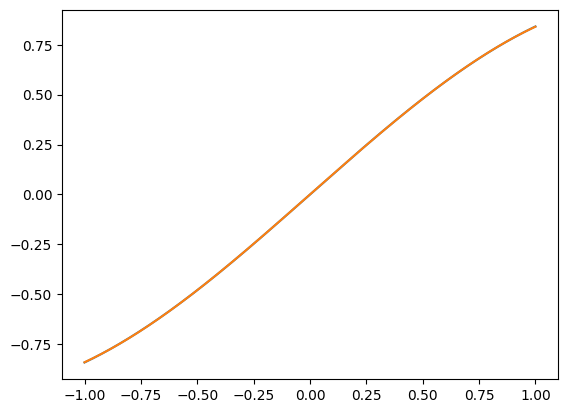

In [34]:
def draw(n, f):
    plt.plot(xs, sp.lambdify(x, f, "numpy")(xs), label="f(x)")
    plt.plot(xs, sp.lambdify(x, approx(n, f), "numpy")(xs), label="a(x)")
    plt.show()

draw(4, sp.sin(x))

n=1
0.90350603681927*x


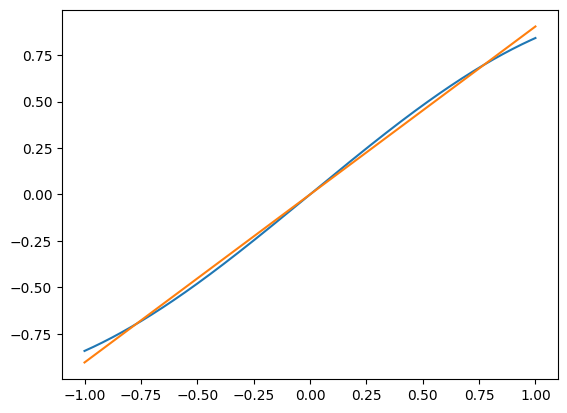

n=2
0.90350603681927*x


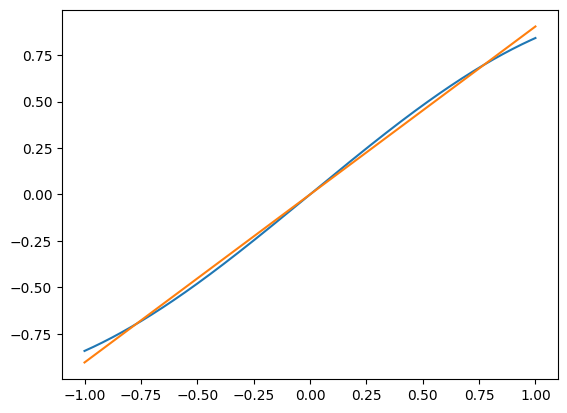

n=3
-0.157615169549469*x**3 + 0.998075138548952*x


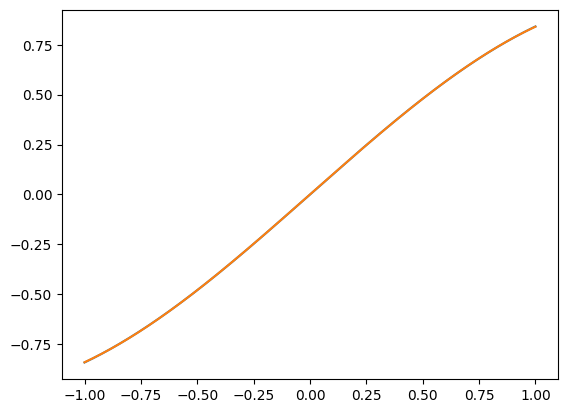

In [37]:
for n in range(1,4):
    print(f"n={n}")
    print(approx(n, sp.sin(x)))
    draw(n, sp.sin(x))

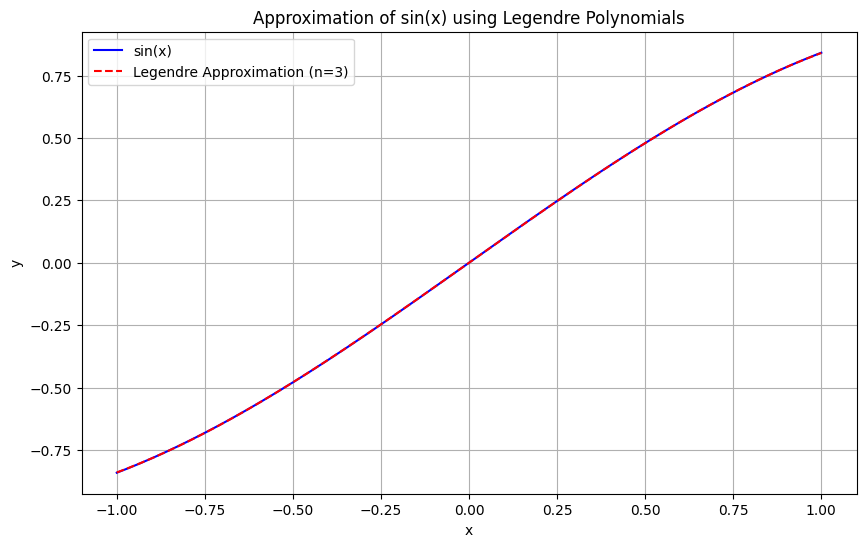

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, legendre, integrate, sin, lambdify

# Define the variable
x = symbols('x')

# Define the function to approximate
f = sin(x)

# Maximum degree of Legendre polynomial
n_max = 3  # You can change this to see better approximations

# Calculate Legendre series approximation
approximation = 0
for n in range(n_max + 1):
    Pn = legendre(n, x)  # Legendre polynomial of degree n
    # Calculate the coefficient using the orthogonality property
    coeff = (2*n + 1)/2 * integrate(f * Pn, (x, -1, 1))
    # Add the term to the approximation
    approximation += coeff * Pn

# Convert SymPy expressions to NumPy functions for plotting
f_lambdified = lambdify(x, f, modules=['numpy'])
approx_lambdified = lambdify(x, approximation, modules=['numpy'])

# Generate x values
x_values = np.linspace(-1, 1, 400)

# Compute y values for the original function and the approximation
y_original = f_lambdified(x_values)
y_approx = approx_lambdified(x_values)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_original, label='sin(x)', color='blue')
plt.plot(x_values, y_approx, label=f'Legendre Approximation (n={n_max})', color='red', linestyle='--')
plt.title('Approximation of sin(x) using Legendre Polynomials')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()